<a href="https://colab.research.google.com/github/RAVITEJA-VADLURI/Mishra-sir-s-assignments/blob/main/asgn(2)_2303A51942.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Value Iteration Values:
 [[-0.43  0.63  1.81  3.12  4.58]
 [ 0.63  1.81  3.12  4.58  6.2 ]
 [ 1.81  3.12  0.    6.2   8.  ]
 [ 3.12  4.58  6.2   8.   10.  ]
 [ 4.58  6.2   8.   10.    0.  ]]
Value Iteration Policy:
 [['R' 'R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'R' 'D']
 ['R' 'D' 'P' 'R' 'D']
 ['R' 'R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'R' 'G']]

Policy Iteration Values:
 [[-0.43  0.63  1.81  3.12  4.58]
 [ 0.63  1.81  3.12  4.58  6.2 ]
 [ 1.81  3.12  0.    6.2   8.  ]
 [ 3.12  4.58  6.2   8.   10.  ]
 [ 4.58  6.2   8.   10.    0.  ]]
Policy Iteration Policy:
 [['R' 'R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'R' 'D']
 ['R' 'D' 'P' 'R' 'D']
 ['R' 'R' 'R' 'R' 'D']
 ['R' 'R' 'R' 'R' 'G']]


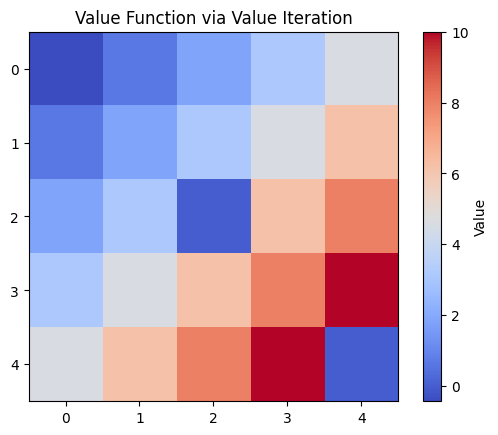

In [1]:
#Implementing Value Iteration and Policy Iteration for simple MDPs.

import numpy as np
import matplotlib.pyplot as plt

N = 5
gamma = 0.9
actions = [(0,1),(0,-1),(1,0),(-1,0)]  # Right, Left, Down, Up
goal = (4,4)
pit = (2,2)

def reward(state):
    if state == goal: return 10
    if state == pit: return -10
    return -1

def next_state(state, action):
    if state == goal or state == pit:
        return state  # terminal
    x, y = state
    dx, dy = action
    nx, ny = x+dx, y+dy
    if 0 <= nx < N and 0 <= ny < N:
        return (nx, ny)
    return state  # if hits wall, stay

# ---------------- Value Iteration ----------------
def value_iteration(theta=1e-4, gamma=0.9):
    V = np.zeros((N,N))
    while True:
        delta = 0
        new_V = np.copy(V)
        for i in range(N):
            for j in range(N):
                s = (i,j)
                if s==goal or s==pit:
                    continue
                values = []
                for a in actions:
                    s_next = next_state(s,a)
                    values.append(reward(s_next) + gamma * V[s_next])
                new_V[s] = max(values)
                delta = max(delta, abs(new_V[s]-V[s]))
        V = new_V
        if delta < theta:
            break
    # extract policy
    policy = np.full((N,N), ' ')
    for i in range(N):
        for j in range(N):
            s=(i,j)
            if s==goal: policy[i,j]='G'
            elif s==pit: policy[i,j]='P'
            else:
                best_a=None; best_val=-1e9
                for a,label in zip(actions,["R","L","D","U"]):
                    s_next=next_state(s,a)
                    val=reward(s_next)+gamma*V[s_next]
                    if val>best_val:
                        best_val=val; best_a=label
                policy[i,j]=best_a
    return V, policy

# ---------------- Policy Iteration ----------------
def policy_iteration(gamma=0.9, max_eval=100):
    policy = np.random.choice(["R","L","D","U"], size=(N,N))
    V = np.zeros((N,N))

    def action_from_label(lbl):
        return {"R":(0,1),"L":(0,-1),"D":(1,0),"U":(-1,0)}[lbl]

    stable=False
    while not stable:
        # Policy Evaluation
        for _ in range(max_eval):
            new_V=np.copy(V)
            for i in range(N):
                for j in range(N):
                    s=(i,j)
                    if s==goal or s==pit: continue
                    a=action_from_label(policy[i,j])
                    s_next=next_state(s,a)
                    new_V[s]=reward(s_next)+gamma*V[s_next]
            V=new_V
        # Policy Improvement
        stable=True
        for i in range(N):
            for j in range(N):
                s=(i,j)
                if s==goal: policy[i,j]='G'; continue
                if s==pit: policy[i,j]='P'; continue
                old=policy[i,j]
                best_val=-1e9; best_a='R'
                for a,label in zip(actions,["R","L","D","U"]):
                    s_next=next_state(s,a)
                    val=reward(s_next)+gamma*V[s_next]
                    if val>best_val:
                        best_val=val; best_a=label
                policy[i,j]=best_a
                if old!=best_a: stable=False
    return V, policy

# Run Value Iteration
V_vi, pi_vi = value_iteration()
print("Value Iteration Values:\n", np.round(V_vi,2))
print("Value Iteration Policy:\n", pi_vi)

# Run Policy Iteration
V_pi, pi_pi = policy_iteration()
print("\nPolicy Iteration Values:\n", np.round(V_pi,2))
print("Policy Iteration Policy:\n", pi_pi)

# Visualization
plt.imshow(V_vi, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Value")
plt.title("Value Function via Value Iteration")
plt.show()
